In [16]:
import numpy as np
import matplotlib.pyplot as plt

In [17]:
# Физические параметры
beta = 4.84e-4  # Пример значения из задания
u0 = 1.0         # Амплитуда начального возмущения
l = 1.0          # Ширина импульса
x0 = 0.0         # Центр импульса

# Критический параметр
sigma_x = np.sqrt(12)

# Выбор sigma (пример: sigma >= sigma_x)
sigma = 4.0  # sigma_x ≈ 3.464, берем больше

# Вычисление l_x и проверка условия
l_x = np.sqrt(12 * beta / u0)
print(f"l_x = {l_x:.4f}")

# Проверка: sigma = l * sqrt(u0 / beta) >= sigma_x
l_required = sigma * np.sqrt(beta / u0)
print(f"Требуемая ширина l = {l_required:.4f} (должна быть >= {l_x:.4f})")

l_x = 0.0762
Требуемая ширина l = 0.0880 (должна быть >= 0.0762)


In [26]:
# Пространственная сетка
L = 20.0       # Длина области
Nx = 1000      # Число узлов
h = L / (Nx-1)
x = np.linspace(-L/2, L/2, Nx)

# Временная сетка
T = 1      # Время моделирования
Nt = 2000      # Число шагов
tau = T / Nt   # Шаг по времени

In [27]:
# Гауссов импульс
u_initial = u0 * np.exp(-(x - x0)**2 / l_required**2)

# Инициализация массивов
u_prev = u_initial.copy()  # u^{n-1}
u_curr = u_initial.copy()  # u^n
u_next = np.zeros_like(u_initial)

In [28]:
for n in range(1, Nt):
    # Граничные условия (периодические)
    u_curr_ext = np.pad(u_curr, (3, 3), mode='wrap')
    
    # Вычисление u^{n+1}
    for j in range(3, Nx+3):
        # Нелинейный член
        nonlin = (u_curr_ext[j] / (6 * h)) * (
            u_curr_ext[j+2] - 8*u_curr_ext[j+1] + 8*u_curr_ext[j-1] - u_curr_ext[j-2]
        )
        
        # Дисперсионный член
        disp = (beta * tau / (4 * h**3)) * (
            u_curr_ext[j+3] - 8*u_curr_ext[j+2] + 13*u_curr_ext[j+1]
            - 13*u_curr_ext[j-1] + 8*u_curr_ext[j-2] - u_curr_ext[j-3]
        )
        
        u_next[j-3] = u_prev[j-3] + nonlin + disp
    
    # Обновление временных слоев
    u_prev, u_curr = u_curr, u_next.copy()

/tmp/ipykernel_8563/2315359943.py:8: RuntimeWarning: overflow encountered in scalar multiply
  nonlin = (u_curr_ext[j] / (6 * h)) * (
/tmp/ipykernel_8563/2315359943.py:18: RuntimeWarning: invalid value encountered in scalar add
  u_next[j-3] = u_prev[j-3] + nonlin + disp
/tmp/ipykernel_8563/2315359943.py:14: RuntimeWarning: invalid value encountered in scalar subtract
  u_curr_ext[j+3] - 8*u_curr_ext[j+2] + 13*u_curr_ext[j+1]
/tmp/ipykernel_8563/2315359943.py:9: RuntimeWarning: invalid value encountered in scalar subtract
  u_curr_ext[j+2] - 8*u_curr_ext[j+1] + 8*u_curr_ext[j-1] - u_curr_ext[j-2]
/tmp/ipykernel_8563/2315359943.py:14: RuntimeWarning: invalid value encountered in scalar add
  u_curr_ext[j+3] - 8*u_curr_ext[j+2] + 13*u_curr_ext[j+1]
/tmp/ipykernel_8563/2315359943.py:9: RuntimeWarning: invalid value encountered in scalar add
  u_curr_ext[j+2] - 8*u_curr_ext[j+1] + 8*u_curr_ext[j-1] - u_curr_ext[j-2]


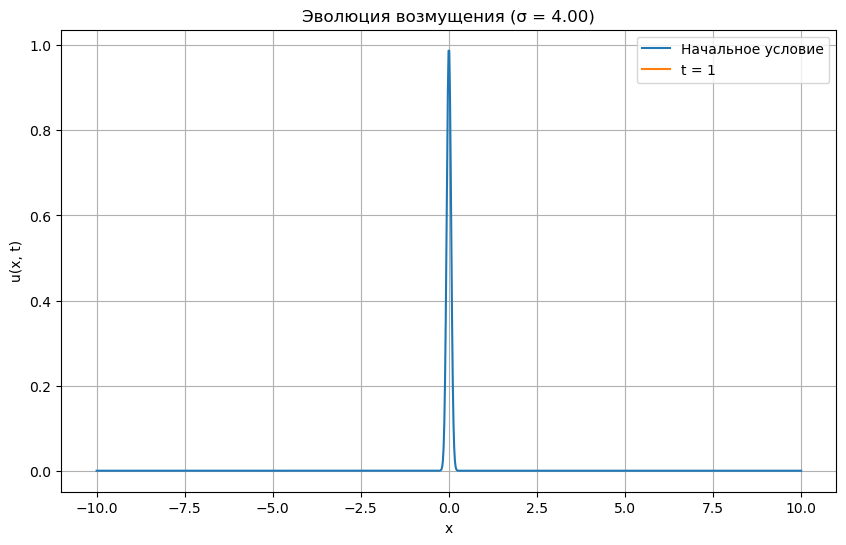

In [29]:
plt.figure(figsize=(10, 6))
plt.plot(x, u_initial, label="Начальное условие")
plt.plot(x, u_curr, label=f"t = {T}")
plt.xlabel("x")
plt.ylabel("u(x, t)")
plt.title(f"Эволюция возмущения (σ = {sigma:.2f})")
plt.legend()
plt.grid()
plt.show()

In [30]:
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interact, FloatSlider, IntSlider

def solve_kdv(beta=4.84e-4, u0=1.0, l=1.0, sigma=4.0, L=20.0, Nx=500, T=5.0, Nt=1000):
    # Проверка устойчивости
    sigma_x = np.sqrt(12)
    l_required = sigma * np.sqrt(beta / u0)
    l_x = np.sqrt(12 * beta / u0)
    
    if sigma < sigma_x:
        print(f"⚠️ Предупреждение: σ = {sigma:.2f} < σ_x = {sigma_x:.2f}. Схема может быть неустойчивой!")
    
    # Сетка
    h = L / (Nx - 1)
    tau = T / Nt
    x = np.linspace(-L/2, L/2, Nx)
    
    # Начальное условие (Гауссов импульс)
    u_initial = u0 * np.exp(-(x - 0.0)**2 / l_required**2)
    u_prev = u_initial.copy()
    u_curr = u_initial.copy()
    u_next = np.zeros_like(u_initial)
    
    # Интегрирование
    for n in range(1, Nt):
        u_curr_ext = np.pad(u_curr, (3, 3), mode='wrap')
        
        for j in range(3, Nx + 3):
            # Нелинейный член
            nonlin = (u_curr_ext[j] / (6 * h)) * (
                u_curr_ext[j+2] - 8*u_curr_ext[j+1] + 8*u_curr_ext[j-1] - u_curr_ext[j-2]
            )
            
            # Дисперсионный член
            disp = (beta * tau / (4 * h**3)) * (
                u_curr_ext[j+3] - 8*u_curr_ext[j+2] + 13*u_curr_ext[j+1] - 
                13*u_curr_ext[j-1] + 8*u_curr_ext[j-2] - u_curr_ext[j-3]
            )
            
            u_next[j-3] = u_prev[j-3] + nonlin + disp
        
        u_prev, u_curr = u_curr, u_next.copy()
    
    # Визуализация
    plt.figure(figsize=(12, 6))
    plt.plot(x, u_initial, 'b--', label=f"Начальное условие (σ = {sigma:.2f})")
    plt.plot(x, u_curr, 'r-', label=f"t = {T:.1f}")
    plt.xlabel("x")
    plt.ylabel("u(x, t)")
    plt.title(f"Уравнение КдВ: β = {beta:.2e}, u0 = {u0:.1f}, L = {L:.1f}")
    plt.legend()
    plt.grid()
    plt.show()

# Интерактивные виджеты
interact(
    solve_kdv,
    beta=FloatSlider(min=1e-5, max=1e-3, step=1e-5, value=4.84e-4, description="β"),
    u0=FloatSlider(min=0.1, max=2.0, step=0.1, value=1.0, description="u₀"),
    l=FloatSlider(min=0.1, max=2.0, step=0.1, value=1.0, description="l"),
    sigma=FloatSlider(min=3.0, max=10.0, step=0.1, value=4.0, description="σ"),
    L=FloatSlider(min=10.0, max=50.0, step=5.0, value=20.0, description="L"),
    Nx=IntSlider(min=100, max=2000, step=100, value=500, description="Nx"),
    T=FloatSlider(min=0.1, max=20.0, step=0.5, value=5.0, description="T"),
    Nt=IntSlider(min=100, max=5000, step=100, value=1000, description="Nt"),
)

interactive(children=(FloatSlider(value=0.000484, description='β', max=0.001, min=1e-05, step=1e-05), FloatSli…

<function __main__.solve_kdv(beta=0.000484, u0=1.0, l=1.0, sigma=4.0, L=20.0, Nx=500, T=5.0, Nt=1000)>

In [31]:
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interact, FloatSlider, IntSlider

def solve_kdv(beta=4.84e-4, u0=1.0, l=1.0, sigma=4.0, L=20.0, Nx=1000, T=2.0, Nt=2000):
    """Решаем уравнение КдВ с интерактивными параметрами"""
    
    # 1. Проверка параметров устойчивости
    sigma_x = np.sqrt(12)
    if sigma < sigma_x:
        print(f"⚠️ Внимание: σ = {sigma:.2f} < σ_x = {sigma_x:.2f}. Уменьшите шаги или увеличьте σ!")
    
    # 2. Создание сетки
    h = L / (Nx - 1)
    tau = T / Nt
    x = np.linspace(-L/2, L/2, Nx)
    
    # 3. Проверка числа Куранта
    CFL = tau / h**3
    if CFL > 0.5:
        print(f"⚠️ CFL = {CFL:.2f} > 0.5! Уменьшите tau или увеличьте h")
    
    # 4. Начальное условие (модифицированный Гауссов импульс)
    l_effective = l * np.sqrt(beta/u0) * sigma
    u_initial = u0 * np.exp(-(x - 0.0)**2 / (2*l_effective**2))
    
    # 5. Инициализация массивов
    u_prev = u_initial.copy()  # u^{n-1}
    u_curr = u_initial.copy()  # u^n
    u_next = np.zeros_like(u_initial)
    
    # 6. Главный цикл по времени с обработкой границ
    for n in range(1, Nt):
        # Расширение массива с граничными условиями
        u_padded = np.pad(u_curr, (3, 3), mode='edge')  # Режим 'edge' лучше для стабильности
        
        for j in range(3, Nx+3):
            # 7. Аккуратные вычисления с проверкой на переполнение
            try:
                # Нелинейный член (центральная разность)
                du = u_padded[j+2] - 8*u_padded[j+1] + 8*u_padded[j-1] - u_padded[j-2]
                nonlin = (u_padded[j] / (6*h)) * du
                
                # Дисперсионный член
                d3u = (u_padded[j+3] - 8*u_padded[j+2] + 13*u_padded[j+1] - 
                      13*u_padded[j-1] + 8*u_padded[j-2] - u_padded[j-3])
                disp = (beta * tau / (4*h**3)) * d3u
                
                # Обновление решения
                u_next[j-3] = u_prev[j-3] + nonlin + disp
                
            except FloatingPointError:
                u_next[j-3] = 0  # Запасной вариант при ошибке
        
        # 8. Обновление временных слоев
        u_prev, u_curr = u_curr, np.nan_to_num(u_next)  # Обработка NaN
    
    # 9. Визуализация
    plt.figure(figsize=(12, 6))
    plt.plot(x, u_initial, 'b--', linewidth=2, label=f"Начальное (σ={sigma:.1f})")
    plt.plot(x, u_curr, 'r-', linewidth=1.5, label=f"t={T:.1f} (CFL={CFL:.2f})")
    plt.xlabel("x", fontsize=12)
    plt.ylabel("u(x,t)", fontsize=12)
    plt.title(f"Уравнение КдВ: β={beta:.1e}, u0={u0:.1f}, L={L:.0f}", fontsize=14)
    plt.legend()
    plt.grid(True, alpha=0.3)
    plt.show()

# 10. Интерактивные элементы управления
interact(
    solve_kdv,
    beta=FloatSlider(min=1e-5, max=1e-3, step=1e-5, value=4.84e-4, description="β (дисперсия)"),
    u0=FloatSlider(min=0.1, max=2.0, step=0.1, value=1.0, description="u₀ (амплитуда)"),
    l=FloatSlider(min=0.5, max=5.0, step=0.1, value=1.0, description="l (ширина)"),
    sigma=FloatSlider(min=3.5, max=10.0, step=0.1, value=4.0, description="σ (устойчивость)"),
    L=FloatSlider(min=10.0, max=50.0, step=5.0, value=20.0, description="L (область)"),
    Nx=IntSlider(min=200, max=5000, step=100, value=1000, description="Nx (сетка)"),
    T=FloatSlider(min=0.1, max=10.0, step=0.1, value=2.0, description="T (время)"),
    Nt=IntSlider(min=100, max=10000, step=100, value=2000, description="Nt (шаги)"),
)

interactive(children=(FloatSlider(value=0.000484, description='β (дисперсия)', max=0.001, min=1e-05, step=1e-0…

<function __main__.solve_kdv(beta=0.000484, u0=1.0, l=1.0, sigma=4.0, L=20.0, Nx=1000, T=2.0, Nt=2000)>

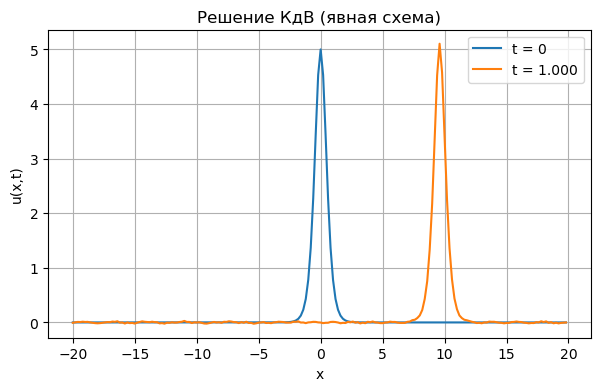

In [35]:
import numpy as np
import matplotlib.pyplot as plt

def apply_periodic_bc(u):
    """
    Периодические граничные условия:
    u[0]  ← u[-2],  u[-1] ← u[1]
    """
    u[0]  = u[-2]
    u[-1] = u[1]
    return u

def derivative_x(u, dx):
    """
    Центральная конечно-разностная аппроксимация первой производной (2-й порядок):
    u_x[i] ≈ (u[i+1] - u[i-1]) / (2·dx)
    """
    du = np.zeros_like(u)
    du[1:-1] = (u[2:] - u[:-2]) / (2.0 * dx)
    du[0]  = (u[1] - u[-2]) / (2.0 * dx)
    du[-1] = du[0]
    return du

def derivative_xxx(u, dx):
    """
    Третья производная (2-й порядок, центральные разности):
    u_xxx[i] ≈ (u[i+2] - 2·u[i+1] + 2·u[i-1] - u[i-2]) / (2·dx^3)
    """
    d3u = np.zeros_like(u)
    d3u[2:-2] = (u[4:] - 2*u[3:-1] + 2*u[1:-3] - u[0:-4]) / (2.0 * dx**3)
    # Для краёв используем периодические значения:
    d3u[0]  = (u[2] - 2*u[1]  + 2*u[-1]  - u[-2]) / (2.0 * dx**3)
    d3u[1]  = (u[3] - 2*u[2]  + 2*u[0]   - u[-1]) / (2.0 * dx**3)
    d3u[-2] = (u[0] - 2*u[-1] + 2*u[-3]  - u[-4]) / (2.0 * dx**3)
    d3u[-1] = (u[1] - 2*u[0]  + 2*u[-2]  - u[-3]) / (2.0 * dx**3)
    return d3u

def rhs_kdv(u, dx):
    """
    Правая часть уравнения КдВ: u_t = -6·u·u_x - u_xxx
    """
    u = apply_periodic_bc(u)
    ux = derivative_x(u, dx)
    uxxx = derivative_xxx(u, dx)
    return -6.0 * u * ux - uxxx

def solve_kdv(u0, x, dt, nt):
    """
    Решение КдВ методом Рунге–Кутта 4-го порядка на равномерной сетке.
    """
    dx = x[1] - x[0]
    u = u0.copy()
    for _ in range(nt):
        u = apply_periodic_bc(u)
        k1 = rhs_kdv(u, dx)
        k2 = rhs_kdv(u + 0.5*dt*k1, dx)
        k3 = rhs_kdv(u + 0.5*dt*k2, dx)
        k4 = rhs_kdv(u + dt*k3, dx)
        u += (dt / 6.0) * (k1 + 2*k2 + 2*k3 + k4)
    return u

if __name__ == "__main__":
    # Параметры области и сетки
    Lx = 40.0
    Nx = 200
    dx = Lx / Nx
    x = np.linspace(-Lx/2, Lx/2 - dx, Nx)

    # Параметры по времени
    dt = 0.001
    nt = 1000

    # Начальное условие – одиночный солитон
    A = 5.0
    x0 = 0.0
    u0 = A * (1.0 / np.cosh(np.sqrt(A/2.0) * (x - x0)))**2

    # Решение
    u_solution = solve_kdv(u0, x, dt, nt)

    # График
    plt.figure(figsize=(7, 4))
    plt.plot(x, u0, label='t = 0')
    plt.plot(x, u_solution, label=f't = {nt*dt:.3f}')
    plt.title('Решение КдВ (явная схема)')
    plt.xlabel('x')
    plt.ylabel('u(x,t)')
    plt.legend()
    plt.grid(True)
    plt.show()

In [36]:
import numpy as np
import matplotlib.pyplot as plt
import ipywidgets as widgets
from ipywidgets import interact

def apply_periodic_bc(u):
    """Периодические граничные условия."""
    u[0]  = u[-2]
    u[-1] = u[1]
    return u

def derivative_x(u, dx):
    """
    Центральная конечно-разностная аппроксимация первой производной (2-й порядок):
    u_x[i] ≈ (u[i+1] - u[i-1]) / (2·dx)
    """
    du = np.zeros_like(u)
    du[1:-1] = (u[2:] - u[:-2]) / (2 * dx)
    du[0]  = (u[1] - u[-2]) / (2 * dx)
    du[-1] = du[0]
    return du

def derivative_xxx(u, dx):
    """
    Третья производная (2-й порядок):
    u_xxx[i] ≈ (u[i+2] - 2·u[i+1] + 2·u[i-1] - u[i-2]) / (2·dx^3)
    """
    d3u = np.zeros_like(u)
    d3u[2:-2] = (u[4:] - 2*u[3:-1] + 2*u[1:-3] - u[0:-4]) / (2.0 * dx**3)
    d3u[0]  = (u[2] - 2*u[1]  + 2*u[-1]  - u[-2]) / (2.0 * dx**3)
    d3u[1]  = (u[3] - 2*u[2]  + 2*u[0]   - u[-1]) / (2.0 * dx**3)
    d3u[-2] = (u[0] - 2*u[-1] + 2*u[-3]  - u[-4]) / (2.0 * dx**3)
    d3u[-1] = (u[1] - 2*u[0]  + 2*u[-2]  - u[-3]) / (2.0 * dx**3)
    return d3u

def rhs_kdv(u, dx):
    """Правая часть уравнения КдВ: u_t = -6·u·u_x - u_xxx."""
    u = apply_periodic_bc(u)
    ux = derivative_x(u, dx)
    uxxx = derivative_xxx(u, dx)
    return -6.0 * u * ux - uxxx

def solve_kdv(Lx, Nx, dt, nt, A):
    """
    Решение КдВ методом Рунге–Кутта 4-го порядка при заданных параметрах.
    """
    dx = Lx / Nx
    x = np.linspace(-Lx/2, Lx/2 - dx, Nx)
    # Начальное условие
    u0 = A * (1.0 / np.cosh(np.sqrt(A/2.0) * (x - 0.0)))**2
    u = u0.copy()
    for _ in range(nt):
        u = apply_periodic_bc(u)
        k1 = rhs_kdv(u, dx)
        k2 = rhs_kdv(u + 0.5*dt*k1, dx)
        k3 = rhs_kdv(u + 0.5*dt*k2, dx)
        k4 = rhs_kdv(u + dt*k3, dx)
        u += (dt / 6.0) * (k1 + 2*k2 + 2*k3 + k4)
    return x, u0, u

def run_kdv_interactive(Amplitude=1.0, Nt=1000):
    """
    Запуск решения уравнения КдВ с параметрами Amplitude, Nt
    и построение результата.
    """
    # Параметры области/сетки
    Lx = 40.0
    Nx = 200
    dt = 0.001

    x, u0, u_solution = solve_kdv(Lx, Nx, dt, Nt, Amplitude)

    plt.figure(figsize=(7, 4))
    plt.plot(x, u0, label='t = 0')
    plt.plot(x, u_solution, label=f't = {Nt*dt:.3f}')
    plt.title('Решение КдВ (явная схема, интерактив)')
    plt.xlabel('x')
    plt.ylabel('u(x,t)')
    plt.legend()
    plt.grid(True)
    plt.show()

# Виджет слайдера для амплитуды и количества шагов
interact(
    run_kdv_interactive,
    Amplitude=widgets.FloatSlider(min=0.5, max=2.0, step=0.1, value=1.0, description='Амплитуда'),
    Nt=widgets.IntSlider(min=100, max=3000, step=100, value=1000, description='Число шагов')
)

interactive(children=(FloatSlider(value=1.0, description='Амплитуда', max=2.0, min=0.5), IntSlider(value=1000,…

<function __main__.run_kdv_interactive(Amplitude=1.0, Nt=1000)>

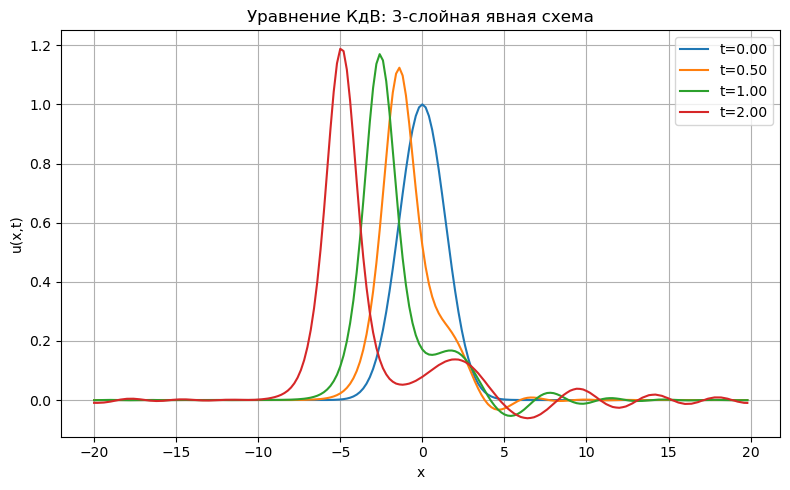

In [37]:
import numpy as np
import matplotlib.pyplot as plt

def apply_periodic_bc(u):
    """
    Периодические граничные условия:
    u[0]   ← u[-2], 
    u[-1]  ← u[1]  
    """
    u[0]  = u[-2]
    u[-1] = u[1]
    return u

def derivative_x(u, dx):
    """
    Центральная разностная аппроксимация (2-й порядок) первой производной:
    u_x[i] ≈ (u[i+1] - u[i-1]) / 2dx
    """
    du = np.zeros_like(u)
    du[1:-1] = (u[2:] - u[:-2]) / (2.0 * dx)
    # Краевые значения - с учётом периодичности
    du[0]  = (u[1] - u[-2]) / (2.0 * dx)
    du[-1] = du[0]
    return du

def derivative_xxx(u, dx):
    """
    Центральная разностная аппроксимация (2-й порядок) третьей производной:
    u_xxx[i] ≈ (u[i+2] - 2u[i+1] + 2u[i-1] - u[i-2]) / (2 dx^3).
    """
    d3u = np.zeros_like(u)
    d3u[2:-2] = (
        u[4:] - 2*u[3:-1] + 2*u[1:-3] - u[0:-4]
    ) / (2.0 * dx**3)
    # Для крайних узлов используем периодические значения
    d3u[0]  = (u[2] - 2*u[1]  + 2*u[-1]  - u[-2]) / (2.0 * dx**3)
    d3u[1]  = (u[3] - 2*u[2]  + 2*u[0]   - u[-1]) / (2.0 * dx**3)
    d3u[-2] = (u[0] - 2*u[-1] + 2*u[-3]  - u[-4]) / (2.0 * dx**3)
    d3u[-1] = (u[1] - 2*u[0]  + 2*u[-2]  - u[-3]) / (2.0 * dx**3)
    return d3u

def rhs_kdv(u, dx):
    """
    Правая часть уравнения КдВ:
        u_t = -6 u·u_x - u_xxx
    """
    u   = apply_periodic_bc(u)
    ux  = derivative_x(u, dx)
    uxxx = derivative_xxx(u, dx)
    return -6.0 * u * ux - uxxx

def solve_kdv_3layer_explicit(u0, x, dt, Nt):
    """
    Явная трёхслойная (центральная) схема по времени.
    
    Схема:
      (u^{n+1} - u^{n-1}) / (2Δt) = -6 u^n u_x^n - u_xxx^n
    => u^{n+1} = u^{n-1} - 2Δt ( 6u^n u_x^n + u_xxx^n )
    
    При этом нам нужно:
      1) Иметь u^0 (начальное условие).
      2) Иметь u^1, которую можно получить, например, "пробным" шагом (например, прямым Эйлером).
      3) Считать триплетом (n+1, n, n-1) в цикле.
    """
    dx = x[1] - x[0]
    
    # u^0: начальное условие
    u_n = u0.copy()
    # Сформируем "u^-1" - для начала нужна "u^1" (первый шаг).
    # Возьмём простой прямой Эйлер (один шаг из u^0):
    f0 = rhs_kdv(u_n, dx)
    u_np1 = u_n + dt * f0  # u^{1} (Эйлер)
    
    # Для старшего индекса на шаге 2 (уже переходим на схему с n+1, n, n-1)
    # nt = общее число шагов по времени (включая самый первый).
    
    # Сохраняем результаты в массив, если хотим смотреть динамику:
    # Или достаточно хранить лишь текущее и предыдущее решения.
    # Здесь для наглядности сохраним всё.
    sol = np.zeros((Nt+1, len(u0)))
    sol[0, :] = u_n   # u^0
    sol[1, :] = u_np1 # u^1
    
    u_nm1 = u_n     # u^{n-1}
    u_n    = u_np1  # u^n
    
    for step in range(2, Nt+1):
        # Вычисляем правую часть для u^n (шаблон n+1, n, n-1)
        f_n = rhs_kdv(u_n, dx)
        # u^{n+1} = u^{n-1} - 2 dt ( rhs(u^n) )
        u_np1 = u_nm1 - 2.0 * dt * f_n
        
        # Запоминаем
        sol[step, :] = u_np1
        
        # Сдвигаем слои
        u_nm1 = u_n
        u_n   = u_np1
    
    return sol

if __name__ == "__main__":
    # Параметры пространства
    Lx = 40.0
    Nx = 200
    dx = Lx / Nx
    x  = np.linspace(-Lx/2, Lx/2 - dx, Nx)
    
    # Параметры времени
    dt = 0.0005   # Шаг по времени (меняйте для исследования устойчивости)
    Nt = 4000     # Число шагов
    
    # Начальное локализованное возмущение (например, "колокол" или солитон)
    def initial_bump(x, amp=1.0, width=2.0):
        """
        Простая гладкая "шишка" (e.g. гауссиана):
        u(x,0) = amp * exp(- (x/width)^2 )
        """
        return amp * np.exp(-(x/width)**2)
    
    # Задаём начальное условие
    u0 = initial_bump(x, amp=1.0, width=2.0)
    
    # Решаем уравнение КдВ трёхслойной схемой
    sol_all = solve_kdv_3layer_explicit(u0, x, dt, Nt)
    
    # Выведем решение в разные моменты времени
    # Например, t=0 (начальное), t1=Nt//4, t2=Nt//2, t3=Nt
    times_to_plot = [0, Nt//4, Nt//2, Nt]
    
    plt.figure(figsize=(8, 5))
    for idx in times_to_plot:
        plt.plot(x, sol_all[idx], label=f"t={idx*dt:.2f}")
    plt.grid(True)
    plt.xlabel("x")
    plt.ylabel("u(x,t)")
    plt.title("Уравнение КдВ: 3-слойная явная схема")
    plt.legend()
    plt.tight_layout()
    plt.show()

In [38]:
# Пример интерактивной версии
# Убедитесь, что установлены ipywidgets:
#   pip install ipywidgets
# и активированы в Jupyter:
#   jupyter nbextension enable --py widgetsnbextension

import numpy as np
import matplotlib.pyplot as plt
import ipywidgets as widgets
from ipywidgets import interact

def apply_periodic_bc(u):
    u[0]  = u[-2]
    u[-1] = u[1]
    return u

def derivative_x(u, dx):
    du = np.zeros_like(u)
    du[1:-1] = (u[2:] - u[:-2]) / (2.0 * dx)
    du[0]  = (u[1] - u[-2]) / (2.0 * dx)
    du[-1] = du[0]
    return du

def derivative_xxx(u, dx):
    d3u = np.zeros_like(u)
    d3u[2:-2] = (u[4:] - 2*u[3:-1] + 2*u[1:-3] - u[0:-4]) / (2.0 * dx**3)
    d3u[0]  = (u[2] - 2*u[1]  + 2*u[-1]  - u[-2]) / (2.0 * dx**3)
    d3u[1]  = (u[3] - 2*u[2]  + 2*u[0]   - u[-1]) / (2.0 * dx**3)
    d3u[-2] = (u[0] - 2*u[-1] + 2*u[-3]  - u[-4]) / (2.0 * dx**3)
    d3u[-1] = (u[1] - 2*u[0]  + 2*u[-2]  - u[-3]) / (2.0 * dx**3)
    return d3u

def rhs_kdv(u, dx):
    u = apply_periodic_bc(u)
    ux = derivative_x(u, dx)
    uxxx = derivative_xxx(u, dx)
    return -6.0 * u * ux - uxxx

def solve_kdv_3layer_explicit(u0, x, dt, Nt):
    dx = x[1] - x[0]
    u_n = u0.copy()
    f0 = rhs_kdv(u_n, dx)
    u_np1 = u_n + dt * f0  # Первый шаг (Эйлер)

    sol = np.zeros((Nt+1, len(u0)))
    sol[0, :] = u_n
    sol[1, :] = u_np1

    u_nm1 = u_n
    u_n   = u_np1

    for step in range(2, Nt+1):
        f_n = rhs_kdv(u_n, dx)
        u_np1 = u_nm1 - 2.0 * dt * f_n
        sol[step, :] = u_np1
        u_nm1 = u_n
        u_n   = u_np1

    return sol

@interact(
    Amplitude=widgets.FloatSlider(min=0.5, max=3.0, step=0.5, value=1.0, description='Амплитуда'),
    Width=widgets.FloatSlider(min=1.0, max=5.0, step=0.5, value=2.0, description='Ширина'),
    dt=widgets.FloatLogSlider(base=10, min=-4, max=-2, step=0.1, value=0.0005, description='dt'),
    Nx=widgets.IntSlider(min=50, max=300, step=50, value=200, description='Nx'),
    Nt=widgets.IntSlider(min=1000, max=8000, step=1000, value=4000, description='Nt')
)
def run_kdv_3layer_interactive(Amplitude, Width, dt, Nx, Nt):
    """
    Запуск решения уравнения КдВ (3-слойная схема) в интерактивном режиме.
    """
    Lx = 40.0
    x = np.linspace(-Lx/2, Lx/2 - (Lx/Nx), Nx)

    # Начальное локализованное возмущение (гауссиана)
    def initial_bump(x, amp=1.0, width=2.0):
        return amp * np.exp(-(x/width)**2)

    u0 = initial_bump(x, amp=Amplitude, width=Width)

    sol_all = solve_kdv_3layer_explicit(u0, x, dt, Nt)

    times_to_plot = [0, Nt//4, Nt//2, Nt]
    plt.figure(figsize=(8, 4))
    for idx in times_to_plot:
        plt.plot(x, sol_all[idx], label=f"t={idx*dt:.3e}")
    plt.grid(True)
    plt.xlabel("x")
    plt.ylabel("u(x,t)")
    plt.title("Уравнение КдВ: 3-слойная явная схема (интерактив)")
    plt.legend()
    plt.show()

interactive(children=(FloatSlider(value=1.0, description='Амплитуда', max=3.0, min=0.5, step=0.5), FloatSlider…

In [46]:
import numpy as np
import matplotlib.pyplot as plt
import ipywidgets as widgets
from ipywidgets import interact

def apply_periodic_bc(u):
    u[0]  = u[-2]
    u[-1] = u[1]
    return u

def derivative_x(u, dx):
    du = np.zeros_like(u)
    du[1:-1] = (u[2:] - u[:-2]) / (2.0 * dx)
    du[0]  = (u[1] - u[-2]) / (2.0 * dx)
    du[-1] = du[0]
    return du

def derivative_xxx(u, dx):
    d3u = np.zeros_like(u)
    d3u[2:-2] = (
        u[4:] - 2*u[3:-1] + 2*u[1:-3] - u[0:-4]
    ) / (2.0 * dx**3)
    d3u[0]  = (u[2] - 2*u[1]  + 2*u[-1]  - u[-2]) / (2.0 * dx**3)
    d3u[1]  = (u[3] - 2*u[2]  + 2*u[0]   - u[-1]) / (2.0 * dx**3)
    d3u[-2] = (u[0] - 2*u[-1] + 2*u[-3]  - u[-4]) / (2.0 * dx**3)
    d3u[-1] = (u[1] - 2*u[0]  + 2*u[-2]  - u[-3]) / (2.0 * dx**3)
    return d3u

def rhs_kdv(u, dx):
    u = apply_periodic_bc(u)
    ux = derivative_x(u, dx)
    uxxx = derivative_xxx(u, dx)
    return -6.0 * u * ux - uxxx

def solve_kdv_3layer_explicit(u0, x, dt, Nt):
    """
    Трёхслойная явная схема (центральная по времени):
      (u^(n+1) - u^(n-1)) / (2 dt) = -6 u^n u_x^n - u_xxx^n.
    """
    dx = x[1] - x[0]
    u_n = u0.copy()
    # Пробный шаг (Эйлер) для u^1
    f0 = rhs_kdv(u_n, dx)
    u_np1 = u_n + dt * f0
    
    sol = np.zeros((Nt+1, len(u0)))
    sol[0, :] = u_n
    sol[1, :] = u_np1

    u_nm1 = u_n
    u_n   = u_np1

    for step in range(2, Nt+1):
        f_n = rhs_kdv(u_n, dx)
        # u^(n+1) = u^(n-1) - 2 dt f(u^n)
        u_np1 = u_nm1 - 2.0 * dt * f_n
        sol[step, :] = u_np1
        
        u_nm1 = u_n
        u_n   = u_np1

    return sol

def initial_bump(x, amp, width):
    """ Локализованное начальное возмущение (гауссиана). """
    return amp * np.exp(-(x / width)**2)

@interact(
    amp=widgets.FloatSlider(min=0.5, max=3.0, step=0.5, value=1.0, description='Amp', continuous_update=False),
    width=widgets.FloatSlider(min=0.5, max=5.0, step=0.5, value=2.0, description='Width', continuous_update=False),
    dt=widgets.FloatLogSlider(value=0.0005, base=10, min=-5, max=-2, step=0.1, description='dt', continuous_update=False),
    Nx=widgets.IntSlider(min=50, max=300, step=50, value=200, description='Nx', continuous_update=False),
    Nt=widgets.IntSlider(min=500, max=6000, step=500, value=2000, description='Nt', continuous_update=False),
    timeIndex=widgets.IntSlider(min=0, max=2000, step=50, value=0, description='tIndex')
)
def run_simulation(amp, width, dt, Nx, Nt, timeIndex):
    """
    Решаем уравнение КдВ с трёхслойной явной схемой и отображаем
    решение на временном слое timeIndex.
    Подход: при каждом изменении параметров пересчитываем решение заново.
    """
    Lx = 40.0
    x = np.linspace(-Lx/2, Lx/2 - Lx/Nx, Nx)
    
    # Начальное условие
    u0 = initial_bump(x, amp, width)
    
    # Решение
    sol = solve_kdv_3layer_explicit(u0, x, dt, Nt)
    
    # Ограничим выбранный timeIndex границами [0, Nt]
    timeIndex = min(max(timeIndex, 0), Nt)
    t_current = timeIndex * dt

    plt.figure(figsize=(7, 3.5))
    plt.plot(x, sol[timeIndex], label=f't = {t_current:.3e}')
    plt.title('3-слойная схема КдВ (изучение устойчивости)')
    plt.xlabel('x')
    plt.ylabel('u(x,t)')
    plt.grid(True)
    plt.legend()
    plt.show()

interactive(children=(FloatSlider(value=1.0, continuous_update=False, description='Amp', max=3.0, min=0.5, ste…

In [47]:
import numpy as np
import matplotlib.pyplot as plt
import ipywidgets as widgets
from ipywidgets import interact

def apply_periodic_bc(u):
    """
    Периодические граничные условия:
    u[0] ← u[-2], u[-1] ← u[1]
    """
    u[0] = u[-2]
    u[-1] = u[1]
    return u

def solve_kdv_3layer_explicit(u0, Lx, Nx, dt, Nt, beta):
    """
    Трёхслойная явная схема для уравнения КдВ:
    u_j^{n+1} = u_j^{n-1} - (tu_j/h)(u_{j+1}^n - u_{j-1}^n)
                - (beta * t / h^3)(u_{j+2}^n - 2u_{j+1}^n + 2u_{j-1}^n - u_{j-2}^n)
    """
    dx = Lx / Nx
    x = np.linspace(-Lx/2, Lx/2 - dx, Nx)
    
    # Инициализация массивов
    u_nm1 = np.zeros_like(u0)  # u^{n-1}
    u_n = u0.copy()            # u^n
    u_np1 = np.zeros_like(u0)  # u^{n+1}
    
    # Сохраняем решение для всех временных слоёв
    sol = np.zeros((Nt+1, Nx))
    sol[0, :] = u_n
    
    # Основной цикл по времени
    for n in range(1, Nt+1):
        # Применяем периодические граничные условия
        u_n = apply_periodic_bc(u_n)
        
        # Вычисляем u^{n+1} по трёхслойной явной схеме
        for j in range(2, Nx-2):
            u_np1[j] = (
                u_nm1[j]
                - (dt / dx) * u_n[j] * (u_n[j+1] - u_n[j-1])
                - (beta * dt / dx**3) * (u_n[j+2] - 2*u_n[j+1] + 2*u_n[j-1] - u_n[j-2])
            )
        
        # Применяем периодические граничные условия для u^{n+1}
        u_np1 = apply_periodic_bc(u_np1)
        
        # Сохраняем слой
        sol[n, :] = u_np1
        
        # Обновляем слои: u^{n-1} ← u^n, u^n ← u^{n+1}
        u_nm1, u_n = u_n, u_np1.copy()
    
    return x, sol

def initial_condition(x, u0, l):
    """
    Локализованное начальное возмущение:
    u(x, 0) = u0 * exp(-(x/l)^2)
    """
    return u0 * np.exp(-(x / l)**2)

@interact(
    u0=widgets.FloatSlider(min=0.5, max=3.0, step=0.1, value=1.0, description='u0'),
    l=widgets.FloatSlider(min=1.0, max=10.0, step=0.5, value=5.0, description='l'),
    beta=widgets.FloatSlider(min=0.1, max=2.0, step=0.1, value=1.0, description='β'),
    sigma=widgets.FloatSlider(min=0.1, max=2.0, step=0.1, value=1.0, description='σ'),
    Nx=widgets.IntSlider(min=50, max=500, step=50, value=200, description='Nx'),
    Nt=widgets.IntSlider(min=100, max=5000, step=100, value=1000, description='Nt'),
    timeIndex=widgets.IntSlider(min=0, max=1000, step=10, value=0, description='tIndex')
)
def run_simulation(u0, l, beta, sigma, Nx, Nt, timeIndex):
    """
    Интерактивное решение уравнения КдВ с трёхслойной явной схемой.
    """
    # Параметры задачи
    Lx = 40.0
    dt = sigma * (l / np.sqrt(u0 / beta)) / Nx  # Вычисляем dt через σ
    
    # Пространственная сетка
    x = np.linspace(-Lx/2, Lx/2 - Lx/Nx, Nx)
    
    # Начальное условие
    u0_array = initial_condition(x, u0, l)
    
    # Решение
    x, sol = solve_kdv_3layer_explicit(u0_array, Lx, Nx, dt, Nt, beta)
    
    # Ограничиваем timeIndex
    timeIndex = min(max(timeIndex, 0), Nt)
    t_current = timeIndex * dt
    
    # Построение графика
    plt.figure(figsize=(8, 4))
    plt.plot(x, sol[timeIndex], label=f't = {t_current:.3e}')
    plt.title('Трёхслойная явная схема для уравнения КдВ')
    plt.xlabel('x')
    plt.ylabel('u(x, t)')
    plt.grid(True)
    plt.legend()
    plt.show()

interactive(children=(FloatSlider(value=1.0, description='u0', max=3.0, min=0.5), FloatSlider(value=5.0, descr…

In [49]:
import numpy as np
import matplotlib.pyplot as plt
import ipywidgets as widgets
from ipywidgets import interact

def apply_periodic_bc(u, num_ghost=2):
    """
    Применяет периодические граничные условия для массива u
    с учетом числа ghost-ячеек num_ghost
    """
    n = len(u)
    for i in range(num_ghost):
        u[i] = u[n - 2*num_ghost + i]
        u[n - num_ghost + i] = u[num_ghost + i]
    return u

def solve_kdv_3layer_explicit(u0, Lx, Nx, dt, Nt, beta):
    """
    Трёхслойная явная схема для уравнения КдВ:
    u_j^{n+1} = u_j^{n-1} - (tau*u_j^n/h)(u_{j+1}^n - u_{j-1}^n)
                - (beta*tau/h^3)(u_{j+2}^n - 2u_{j+1}^n + 2u_{j-1}^n - u_{j-2}^n)
    """
    dx = Lx / Nx
    x = np.linspace(-Lx/2, Lx/2 - dx, Nx)
    
    # Инициализация массивов
    u_nm1 = u0.copy()  # u^{n-1} (начальное условие)
    
    # Начальный шаг для получения u^1 используя схему первого порядка (Эйлер)
    u_n = np.zeros_like(u0)  # u^n (первый слой)
    
    # Правая часть уравнения для первого шага
    for j in range(2, Nx-2):
        u_x = (u0[j+1] - u0[j-1]) / (2*dx)
        u_xxx = (u0[j+2] - 2*u0[j+1] + 2*u0[j-1] - u0[j-2]) / (2*dx**3)
        u_n[j] = u0[j] - dt * (u0[j] * u_x + beta * u_xxx)
    
    # Применяем периодические граничные условия для u^1
    u_n = apply_periodic_bc(u_n)
    
    # Инициализация u^{n+1}
    u_np1 = np.zeros_like(u0)  # u^{n+1} (следующий слой)
    
    # Сохраняем решение для всех временных слоёв
    sol = np.zeros((Nt+1, Nx))
    sol[0, :] = u_nm1
    sol[1, :] = u_n
    
    # Основной цикл по времени для трёхслойной схемы
    for n in range(2, Nt+1):
        # Применяем периодические граничные условия
        u_n = apply_periodic_bc(u_n)
        u_nm1 = apply_periodic_bc(u_nm1)
        
        # Вычисляем u^{n+1} по трёхслойной явной схеме для всех внутренних точек
        for j in range(2, Nx-2):
            u_np1[j] = (
                u_nm1[j]
                - (dt / dx) * u_n[j] * (u_n[j+1] - u_n[j-1])
                - (beta * dt / dx**3) * (u_n[j+2] - 2*u_n[j+1] + 2*u_n[j-1] - u_n[j-2])
            )
        
        # Применяем периодические граничные условия для u^{n+1}
        u_np1 = apply_periodic_bc(u_np1)
        
        # Сохраняем слой
        sol[n, :] = u_np1
        
        # Обновляем слои: u^{n-1} ← u^n, u^n ← u^{n+1}
        u_nm1, u_n = u_n, u_np1.copy()
    
    return x, sol

def initial_condition(x, u0, l, x0=0):
    """
    Локализованное начальное возмущение:
    u(x, 0) = u0 * exp(-((x-x0)/l)^2)
    
    Параметры:
    u0 - амплитуда
    l - характерная ширина
    x0 - положение центра
    """
    return u0 * np.exp(-((x-x0)/l)**2)

@interact(
    u0=widgets.FloatSlider(min=0.5, max=3.0, step=0.1, value=1.0, description='u₀'),
    l=widgets.FloatSlider(min=1.0, max=10.0, step=0.5, value=2.0, description='l'),
    x0=widgets.FloatSlider(min=-10.0, max=10.0, step=0.5, value=0.0, description='x₀'),
    beta=widgets.FloatSlider(min=0.1, max=2.0, step=0.1, value=1.0, description='β'),
    sigma=widgets.FloatSlider(min=0.1, max=12.0, step=0.1, value=1.0, description='σ',
                             tooltip='σ ≤ σc = 12^(1/2) для устойчивости'),
    Nx=widgets.IntSlider(min=50, max=500, step=50, value=200, description='Nx'),
    Nt=widgets.IntSlider(min=100, max=5000, step=100, value=1000, description='Nt'),
    timeIndex=widgets.IntSlider(min=0, max=1000, step=10, value=0, description='tIndex')
)
def run_simulation(u0, l, x0, beta, sigma, Nx, Nt, timeIndex):
    """
    Интерактивное решение уравнения КдВ с трёхслойной явной схемой.
    
    Исследование эволюции локализованного возмущения в зависимости от параметра σ.
    Критерий устойчивости: σ ≤ σc = 12^(1/2).
    """
    # Параметры задачи
    Lx = 40.0
    
    # Вычисляем dt через σ
    # σ = l·(u₀/β)^(1/2)
    # dt = σ·dx/(l·sqrt(u0/β))
    dt = sigma * (l / np.sqrt(u0 / beta)) / Nx
    
    # Критическое значение σ для устойчивости
    sigma_critical = np.sqrt(12)
    stability_status = "устойчиво" if sigma <= sigma_critical else "неустойчиво"
    
    # Пространственная сетка
    x = np.linspace(-Lx/2, Lx/2 - Lx/Nx, Nx)
    
    # Начальное условие
    u0_array = initial_condition(x, u0, l, x0)
    
    # Решение
    x, sol = solve_kdv_3layer_explicit(u0_array, Lx, Nx, dt, Nt, beta)
    
    # Ограничиваем timeIndex
    timeIndex = min(max(timeIndex, 0), Nt)
    t_current = timeIndex * dt
    
    # Построение графика
    plt.figure(figsize=(10, 5))
    
    # Подграфик для текущего решения
    plt.subplot(1, 2, 1)
    plt.plot(x, sol[timeIndex], 'b-')
    plt.title(f'Решение при t = {t_current:.3f}')
    plt.xlabel('x')
    plt.ylabel('u(x, t)')
    plt.grid(True)
    
    # Подграфик для эволюции во времени
    plt.subplot(1, 2, 2)
    plt.plot(x, sol[0], 'r--', label='t = 0')
    time_steps = np.linspace(0, Nt, 5, dtype=int)
    for i in time_steps[1:]:
        if i < len(sol):
            plt.plot(x, sol[i], label=f't = {i*dt:.3f}')
    plt.title(f'Эволюция (σ = {sigma:.2f}, {stability_status})')
    plt.xlabel('x')
    plt.grid(True)
    plt.legend()
    
    plt.tight_layout()
    plt.show()

interactive(children=(FloatSlider(value=1.0, description='u₀', max=3.0, min=0.5), FloatSlider(value=2.0, descr…

In [16]:
import numpy as np
import matplotlib.pyplot as plt
import ipywidgets as widgets
from ipywidgets import interact
from IPython.display import display

def apply_periodic_bc(u, num_ghost=2):
    """Периодические граничные условия с ghost-ячейками"""
    n = len(u)
    for i in range(num_ghost):
        u[i] = u[n - 2*num_ghost + i]
        u[n - num_ghost + i] = u[num_ghost + i]
    return u

def solve_kdv_3layer_explicit(u0, Lx, Nx, dt, Nt, beta):
    """
    Трёхслойная явная схема для уравнения КдВ с отслеживанием устойчивости
    """
    dx = Lx / Nx
    x = np.linspace(-Lx/2, Lx/2 - dx, Nx)
    
    # Инициализация массивов
    u_nm1 = u0.copy()  # u^{n-1}
    u_n = np.zeros_like(u0)  # u^n
    
    # Первый шаг (Эйлер)
    for j in range(2, Nx-2):
        u_x = (u0[j+1] - u0[j-1]) / (2*dx)
        u_xxx = (u0[j+2] - 2*u0[j+1] + 2*u0[j-1] - u0[j-2]) / (2*dx**3)
        u_n[j] = u0[j] - dt * (u0[j] * u_x + beta * u_xxx)
    
    u_n = apply_periodic_bc(u_n)
    u_np1 = np.zeros_like(u0)
    
    # Сохраняем решение
    sol = np.zeros((Nt+1, Nx))
    sol[0, :] = u_nm1
    sol[1, :] = u_n
    
    # Проверка устойчивости
    max_values = np.zeros(Nt+1)
    max_values[0] = np.max(np.abs(u_nm1))
    max_values[1] = np.max(np.abs(u_n))
    
    stability_break = Nt  # По умолчанию - стабильно до конца
    
    # Основной цикл
    for n in range(2, Nt+1):
        u_n = apply_periodic_bc(u_n)
        u_nm1 = apply_periodic_bc(u_nm1)
        
        for j in range(2, Nx-2):
            u_np1[j] = (
                u_nm1[j]
                - (dt / dx) * u_n[j] * (u_n[j+1] - u_n[j-1])
                - (beta * dt / dx**3) * (u_n[j+2] - 2*u_n[j+1] + 2*u_n[j-1] - u_n[j-2])
            )
        
        u_np1 = apply_periodic_bc(u_np1)
        sol[n, :] = u_np1
        
        # Контроль устойчивости - если значения резко возрастают, решение нестабильно
        max_values[n] = np.max(np.abs(u_np1))
        if max_values[n] > 5 * max_values[0] and stability_break == Nt:
            stability_break = n  # Запоминаем шаг, на котором начинается неустойчивость
        
        # Если решение "взрывается" - останавливаем расчёт
        if np.isnan(max_values[n]) or max_values[n] > 100 * max_values[0]:
            sol[n:] = np.nan
            break
            
        u_nm1, u_n = u_n, u_np1.copy()
    
    return x, sol, max_values, stability_break

def initial_condition(x, u0, l, x0=0):
    """Гауссово локализованное возмущение"""
    return u0 * np.exp(-((x-x0)/l)**2)

@interact(
    u0=widgets.FloatSlider(min=0.5, max=3.0, step=0.1, value=1.0, description='u₀'),
    l=widgets.FloatSlider(min=1.0, max=10.0, step=0.5, value=2.0, description='l'),
    x0=widgets.FloatSlider(min=-10.0, max=10.0, step=0.5, value=0.0, description='x₀'),
    beta=widgets.FloatSlider(min=0.1, max=2.0, step=0.1, value=1.0, description='β'),
    sigma=widgets.FloatSlider(min=0.1, max=5.0, step=0.1, value=1.0, description='σ'),
    Nx=widgets.IntSlider(min=50, max=500, step=50, value=200, description='Nx'),
    Nt=widgets.IntSlider(min=100, max=5000, step=100, value=1000, description='Nt'),
    show_stability=widgets.Checkbox(value=True, description='Показать график устойчивости'),
    timeIndex=widgets.IntSlider(min=0, max=1000, step=10, value=0, description='tIndex')
)
def run_simulation(u0, l, x0, beta, sigma, Nx, Nt, show_stability, timeIndex):
    """
    Интерактивное решение с отслеживанием устойчивости в зависимости от σ
    """
    Lx = 40.0
    
    # Вычисляем dt через σ, учитывая формулу σ = l·sqrt(u₀/β)·dt/dx
    dx = Lx / Nx
    dt = sigma * dx / (l * np.sqrt(u0 / beta))
    
    # Теоретическое критическое значение (может отличаться от практического)
    sigma_critical = np.sqrt(12)
    
    # Начальное условие
    x = np.linspace(-Lx/2, Lx/2 - dx, Nx)
    u0_array = initial_condition(x, u0, l, x0)
    
    # Решение с отслеживанием устойчивости
    x, sol, max_values, stability_break = solve_kdv_3layer_explicit(u0_array, Lx, Nx, dt, Nt, beta)
    
    # Если обнаружена неустойчивость, отображаем это
    if stability_break < Nt:
        stability_status = f"неустойчиво (шаг {stability_break}, t={stability_break*dt:.3f})"
    else:
        stability_status = "устойчиво"
    
    # Ограничиваем timeIndex
    timeIndex = min(max(timeIndex, 0), Nt)
    
    # Создаем фигуру
    if show_stability:
        fig = plt.figure(figsize=(12, 8))
        grid_size = (2, 2)
    else:
        fig = plt.figure(figsize=(12, 4))
        grid_size = (1, 2)
    
    # 1. График текущего решения
    plt.subplot2grid(grid_size, (0, 0))
    if timeIndex <= stability_break:
        plt.plot(x, sol[timeIndex], 'b-')
        plt.title(f'Решение при t = {timeIndex*dt:.3f}')
    else:
        plt.plot(x, sol[min(stability_break, len(sol)-1)], 'b-')
        plt.title(f'Решение при t = {min(stability_break, len(sol)-1)*dt:.3f} (последнее устойчивое)')
    plt.xlabel('x')
    plt.ylabel('u(x, t)')
    plt.grid(True)
    
    # 2. График эволюции во времени
    plt.subplot2grid(grid_size, (0, 1))
    plt.plot(x, sol[0], 'k--', label='t = 0')
    
    # Показываем несколько моментов времени
    time_steps = np.linspace(0, min(stability_break, Nt), 5, dtype=int)[1:]
    for i in time_steps:
        if i < len(sol) and not np.isnan(sol[i][0]):
            plt.plot(x, sol[i], label=f't = {i*dt:.3f}')
    
    plt.title(f'Эволюция (σ = {sigma:.2f}, {stability_status})')
    plt.xlabel('x')
    plt.grid(True)
    plt.legend()
    
    # 3. График устойчивости (максимальных значений)
    if show_stability:
        plt.subplot2grid(grid_size, (1, 0), colspan=2)
        valid_steps = min(len(max_values), Nt+1)
        time_array = np.arange(valid_steps) * dt
        
        plt.semilogy(time_array, max_values[:valid_steps], 'b-')
        if stability_break < Nt:
            plt.axvline(x=stability_break*dt, color='r', linestyle='--',
                        label='Начало неустойчивости')
        
        plt.title('Анализ устойчивости (логарифмическая шкала)')
        plt.xlabel('t')
        plt.ylabel('Max |u|')
        plt.grid(True)
        plt.legend()
    
    # Дополнительная информация
    plt.tight_layout()
    plt.figtext(0.5, 0.01, 
                f"Параметры: σ={sigma:.2f} (теор. предел σc≈{sigma_critical:.2f}), "
                f"dt={dt:.6f}, dx={dx:.4f}, β={beta}", 
                ha="center", fontsize=10)
    
    plt.show()

interactive(children=(FloatSlider(value=1.0, description='u₀', max=3.0, min=0.5), FloatSlider(value=2.0, descr…

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import ipywidgets as widgets
from ipywidgets import interact
from IPython.display import display

def apply_periodic_bc(u, num_ghost=2):
    """Периодические граничные условия с ghost-ячейками"""
    n = len(u)
    for i in range(num_ghost):
        u[i] = u[n - 2*num_ghost + i]
        u[n - num_ghost + i] = u[num_ghost + i]
    return u

def solve_kdv_3layer_explicit(u0, Lx, Nx, dt, Nt, beta):
    """
    Трёхслойная явная схема для уравнения КдВ с отслеживанием устойчивости
    """
    dx = Lx / Nx
    x = np.linspace(-Lx/2, Lx/2 - dx, Nx)
    
    # Инициализация массивов
    u_nm1 = u0.copy()  # u^{n-1}
    u_n = np.zeros_like(u0)  # u^n
    
    # Первый шаг (Эйлер)
    for j in range(2, Nx-2):
        u_x = (u0[j+1] - u0[j-1]) / (2*dx)
        u_xxx = (u0[j+2] - 2*u0[j+1] + 2*u0[j-1] - u0[j-2]) / (2*dx**3)
        u_n[j] = u0[j] - dt * (u0[j] * u_x + beta * u_xxx)
    
    u_n = apply_periodic_bc(u_n)
    u_np1 = np.zeros_like(u0)
    
    # Сохраняем решение
    sol = np.zeros((Nt+1, Nx))
    sol[0, :] = u_nm1
    sol[1, :] = u_n
    
    # Проверка устойчивости
    max_values = np.zeros(Nt+1)
    max_values[0] = np.max(np.abs(u_nm1))
    max_values[1] = np.max(np.abs(u_n))
    
    stability_break = Nt  # По умолчанию - стабильно до конца
    
    # Основной цикл
    for n in range(2, Nt+1):
        u_n = apply_periodic_bc(u_n)
        u_nm1 = apply_periodic_bc(u_nm1)
        
        for j in range(2, Nx-2):
            u_np1[j] = (
                u_nm1[j]
                - (dt / dx) * u_n[j] * (u_n[j+1] - u_n[j-1])
                - (beta * dt / dx**3) * (u_n[j+2] - 2*u_n[j+1] + 2*u_n[j-1] - u_n[j-2])
            )
        
        u_np1 = apply_periodic_bc(u_np1)
        sol[n, :] = u_np1
        
        # Контроль устойчивости - если значения резко возрастают, решение нестабильно
        max_values[n] = np.max(np.abs(u_np1))
        if max_values[n] > 5 * max_values[0] and stability_break == Nt:
            stability_break = n  # Запоминаем шаг, на котором начинается неустойчивость
        
        # Если решение "взрывается" - останавливаем расчёт
        if np.isnan(max_values[n]) or max_values[n] > 100 * max_values[0]:
            sol[n:] = np.nan
            break
            
        u_nm1, u_n = u_n, u_np1.copy()
    
    return x, sol, max_values, stability_break

def initial_condition(x, u0, l, x0=0):
    """Гауссово локализованное возмущение"""
    return u0 * np.exp(-((x-x0)/l)**2)

@interact(
    u0=widgets.FloatSlider(min=0.5, max=3.0, step=0.1, value=1.0, description='u₀'),
    l=widgets.FloatSlider(min=1.0, max=10.0, step=0.5, value=2.0, description='l'),
    x0=widgets.FloatSlider(min=-10.0, max=10.0, step=0.5, value=0.0, description='x₀'),
    beta=widgets.FloatSlider(min=0.1, max=2.0, step=0.1, value=1.0, description='β'),
    dt=widgets.FloatLogSlider(value=0.001, base=10, min=-4, max=-1, step=0.1, description='dt'),
    Nx=widgets.IntSlider(min=50, max=500, step=50, value=200, description='Nx'),
    Nt=widgets.IntSlider(min=100, max=5000, step=100, value=1000, description='Nt'),
    show_stability=widgets.Checkbox(value=False, description='Показать график устойчивости'),
    timeIndex=widgets.IntSlider(min=0, max=1000, step=10, value=0, description='tIndex')
)
def run_simulation(u0, l, x0, beta, dt, Nx, Nt, show_stability, timeIndex):
    """
    Интерактивное решение с вычислением σ = l·sqrt(u₀/β)·dt/dx
    """
    Lx = 40.0
    dx = Lx / Nx
    
    # Вычисляем σ на основе выбранных параметров
    sigma = l * np.sqrt(u0 / beta)
    
    # Теоретическое критическое значение
    sigma_critical = np.sqrt(12)
    
    # Начальное условие
    x = np.linspace(-Lx/2, Lx/2 - dx, Nx)
    u0_array = initial_condition(x, u0, l, x0)
    
    # Решение с отслеживанием устойчивости
    x, sol, max_values, stability_break = solve_kdv_3layer_explicit(u0_array, Lx, Nx, dt, Nt, beta)
    
    # Если обнаружена неустойчивость, отображаем это
    if stability_break < Nt:
        stability_status = f"неустойчиво (шаг {stability_break}, t={stability_break*dt:.3f})"
    else:
        stability_status = "устойчиво"
    
    # Ограничиваем timeIndex
    timeIndex = min(max(timeIndex, 0), Nt)
    
    # Создаем фигуру
    if show_stability:
        fig = plt.figure(figsize=(12, 8))
        grid_size = (2, 2)
    else:
        fig = plt.figure(figsize=(12, 4))
        grid_size = (1, 2)
    
    # 1. График текущего решения
    plt.subplot2grid(grid_size, (0, 0))
    if timeIndex <= stability_break:
        plt.plot(x, sol[timeIndex], 'b-')
        plt.title(f'Решение при t = {timeIndex*dt:.3f}')
    else:
        plt.plot(x, sol[min(stability_break, len(sol)-1)], 'b-')
        plt.title(f'Решение при t = {min(stability_break, len(sol)-1)*dt:.3f} (последнее устойчивое)')
    plt.xlabel('x')
    plt.ylabel('u(x, t)')
    plt.grid(True)
    
    # 2. График эволюции во времени
    plt.subplot2grid(grid_size, (0, 1))
    plt.plot(x, sol[0], 'k--', label='t = 0')
    
    # Показываем несколько моментов времени
    time_steps = np.linspace(0, min(stability_break, Nt), 5, dtype=int)[1:]
    for i in time_steps:
        if i < len(sol) and not np.isnan(sol[i][0]):
            plt.plot(x, sol[i], label=f't = {i*dt:.3f}')
    
    plt.title(f'Эволюция (σ = {sigma:.2f})')
    plt.xlabel('x')
    plt.grid(True)
    plt.legend()
    
    # 3. График устойчивости (максимальных значений)
    if show_stability:
        plt.subplot2grid(grid_size, (1, 0), colspan=2)
        valid_steps = min(len(max_values), Nt+1)
        time_array = np.arange(valid_steps) * dt
        
        plt.semilogy(time_array, max_values[:valid_steps], 'b-')
        if stability_break < Nt:
            plt.axvline(x=stability_break*dt, color='r', linestyle='--',
                        label='Начало неустойчивости')
        
        plt.title('Анализ устойчивости (логарифмическая шкала)')
        plt.xlabel('t')
        plt.ylabel('Max |u|')
        plt.grid(True)
        plt.legend()
    
    # Дополнительная информация о параметрах и устойчивости
    status_color = "green" if sigma <= sigma_critical else "red"
    stability_info = (f"<span style='color:{status_color};font-weight:bold;'>"
                      f"σ = {sigma:.3f} ({'≤' if sigma <= sigma_critical else '>'} σc={sigma_critical:.3f})</span>")
    
    plt.tight_layout()
    plt.figtext(0.5, 0.01, 
                f"Параметры расчёта: dt={dt:.5f}, dx={dx:.4f}, β={beta}, σ={sigma:.3f} (теор. предел σc≈{sigma_critical:.2f})", 
                ha="center", fontsize=10)
    
    plt.show()
    
    # Выводим информацию о параметрах без HTML
    print(f"Параметры: u₀={u0}, l={l}, β={beta}")
    print(f"Расчётное значение σ = {sigma:.3f} (σc = {sigma_critical:.3f})")

interactive(children=(FloatSlider(value=1.0, description='u₀', max=3.0, min=0.5), FloatSlider(value=2.0, descr…

In [18]:
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import FloatSlider, Button, HBox, VBox, Output, FloatLogSlider
from IPython.display import display, clear_output

# Установка режима отображения matplotlib
%matplotlib inline

def solve_kdv(beta, sigma, u0, dt, t_max):
    # Параметры сетки
    L = 2 * np.pi
    N = 200  # Увеличиваем разрешение для лучшей точности
    dx = L / N
    x = np.linspace(0, L, N, endpoint=False)
    x0 = L / 2  # Центр начального возмущения
    
    # Вычисление параметра l
    l = sigma * np.sqrt(beta) / np.sqrt(u0)
    
    # Начальное условие
    u_init = u0 * np.exp(-((x - x0) ** 2) / l**2)
    
    # Массивы для расчетов
    u_prev = u_init.copy()
    
    # Вычисляем первый временной слой по схеме Лакса-Вендроффа:
    
    # Шаг 1: Вычисляем промежуточные значения u_{j+1/2}^{n+1/2}
    u_half = np.zeros(N+1)
    for j in range(N-1):
        # Формула из схемы 2 в задании
        u_half[j] = (1/2)*(u_init[j+1] + u_init[j]) - \
                    (dt/(4*dx))*((u_init[j+1]**2) - (u_init[j]**2)) + \
                    (2*beta/dx**2)*(u_init[min(j+2,N-1)] - 3*u_init[j+1] + 3*u_init[j] - u_init[max(j-1,0)])
    u_half[N-1] = u_half[0]  # Периодическое ГУ
    u_half[N] = u_half[1]    # Для вычисления u_{N-1/2}^{n+1/2}
    
    # Шаг 2: Вычисляем значения u_j^{n+1}
    u_curr = np.zeros(N)
    for j in range(N):
        # Формула из схемы 2 в задании
        u_curr[j] = u_init[j] - \
                   (dt/(2*dx))*((u_half[j]**2) - (u_half[j-1]**2)) + \
                   (2*beta/dx**2)*(u_half[j+1] - 3*u_half[j] + 3*u_half[j-1] - u_half[max(j-2,0)])
    
    # Сохраняем данные
    t_steps = int(t_max / dt)
    save_freq = max(1, t_steps // 50)  # Сохраняем ~50 кадров
    u_history = [u_init.copy(), u_curr.copy()]
    t_points = [0, dt]
    
    # Коэффициенты для трехслойной явной схемы O(τ², h⁴)
    alpha = dt / (6 * dx)
    gamma = beta * dt / (4 * dx**3)
    
    # Основной расчет по трехслойной явной схеме
    is_stable = True
    max_amp = max(np.max(np.abs(u_init)), np.max(np.abs(u_curr)))
    
    for n in range(1, t_steps):
        u_next = np.zeros_like(u_curr)
        
        # Трехслойная явная схема с порядком аппроксимации O(τ², h⁴)
        for j in range(3, N-3):
            # Формула из схемы 3 в задании
            u_next[j] = u_prev[j] + \
                       (dt*u_curr[j]/(6*dx))*(u_curr[(j+2)%N] - 8*u_curr[(j+1)%N] + 8*u_curr[(j-1)%N] - u_curr[(j-2)%N]) + \
                       (beta*dt/(4*dx**3))*(u_curr[(j+3)%N] - 8*u_curr[(j+2)%N] + 13*u_curr[(j+1)%N] - 
                                           13*u_curr[(j-1)%N] + 8*u_curr[(j-2)%N] - u_curr[(j-3)%N])
        
        # Периодические граничные условия
        u_next[:3] = u_next[N-6:N-3]
        u_next[N-3:] = u_next[3:6]
        
        # Проверка устойчивости
        current_max = np.max(np.abs(u_next))
        if current_max > 10 * max_amp:
            is_stable = False
            break
        
        # Обновление переменных
        u_prev = u_curr.copy()
        u_curr = u_next.copy()
        
        # Сохранение результатов
        if n % save_freq == 0:
            u_history.append(u_curr.copy())
            t_points.append((n+1) * dt)
    
    return u_history, t_points, is_stable, x, l

# Глобальные переменные
results = {'u_history': None, 't_points': None, 'is_stable': None, 'x': None, 'l': None}
time_index = 0

# Создаем виджеты
sigma_slider = FloatSlider(value=0.3, min=0.01, max=1.0, step=0.01, description='σ:',
                          tooltip='σ должно быть ≥ 1/√12 ≈ 0.289')
beta_slider = FloatLogSlider(value=4.84e-4, min=-5, max=-2, description='β:')
u0_slider = FloatSlider(value=1.0, min=0.1, max=5.0, step=0.1, description='u₀:')
dt_slider = FloatLogSlider(value=0.001, min=-4, max=-2, description='dt:')
t_max_slider = FloatSlider(value=2.0, min=0.1, max=10.0, step=0.1, description='t_max:')
run_button = Button(description='Запустить', button_style='success')
prev_button = Button(description='←')
next_button = Button(description='→')
output = Output()

def run_simulation(b):
    global time_index
    
    with output:
        clear_output(wait=True)
        
        # Получаем параметры
        sigma = sigma_slider.value
        beta = beta_slider.value
        u0 = u0_slider.value
        dt = dt_slider.value
        t_max = t_max_slider.value
        
        # Проверяем критическое значение σ
        sigma_crit = 1/np.sqrt(12)
        if sigma < sigma_crit:
            print(f"Внимание! σ = {sigma:.4f} меньше критического значения σ₁ = 1/√12 ≈ {sigma_crit:.4f}")
            sigma = sigma_crit
            sigma_slider.value = sigma_crit
        
        # Вычисляем σ по формуле σ = l(u₀/β)^(1/2)
        print(f"Параметры: β = {beta:.2e}, u₀ = {u0:.2f}, σ = {sigma:.4f}, dt = {dt:.5f}")
        
        # Решаем уравнение КдВ
        u_history, t_points, is_stable, x, l = solve_kdv(beta, sigma, u0, dt, t_max)
        
        # Сохраняем результаты
        results['u_history'] = u_history
        results['t_points'] = t_points
        results['is_stable'] = is_stable
        results['x'] = x
        results['l'] = l
        
        time_index = 0
        
        # Выводим информацию
        status = "УСТОЙЧИВО" if is_stable else "НЕУСТОЙЧИВО"
        print(f"Решение {status}")
        print(f"Параметр l = {l:.4f}")
        print(f"Число временных слоев: {len(t_points)}")
        
        # Отображаем график
        plot_solution()

def plot_solution():
    if results['u_history'] is None:
        print("Сначала запустите моделирование!")
        return
    
    plt.figure(figsize=(10, 6))
    plt.plot(results['x'], results['u_history'][time_index])
    
    # Добавляем сетку и метки осей
    plt.grid(True)
    plt.xlabel('x')
    plt.ylabel('u')
    
    # Заголовок с информацией
    status = "устойчиво" if results['is_stable'] else "неустойчиво"
    plt.title(f"t = {results['t_points'][time_index]:.3f}, σ = {sigma_slider.value:.4f}, решение {status}")
    
    # Устанавливаем пределы по y
    plt.ylim([-1.5*u0_slider.value, 1.5*u0_slider.value])
    
    plt.show()
    
    print(f"Текущее время: t = {results['t_points'][time_index]:.3f} "
          f"(кадр {time_index+1} из {len(results['t_points'])})")

def next_time(b):
    global time_index
    if results['u_history'] is None:
        return
    
    time_index = min(time_index + 1, len(results['t_points']) - 1)
    with output:
        clear_output(wait=True)
        plot_solution()

def prev_time(b):
    global time_index
    if results['u_history'] is None:
        return
    
    time_index = max(time_index - 1, 0)
    with output:
        clear_output(wait=True)
        plot_solution()

# Привязываем функции к кнопкам
run_button.on_click(run_simulation)
next_button.on_click(next_time)
prev_button.on_click(prev_time)

# Выводим интерфейс
display(VBox([
    HBox([sigma_slider, beta_slider]),
    HBox([u0_slider, dt_slider, t_max_slider]),
    HBox([run_button, prev_button, next_button]),
    output
]))

print("Для исследования влияния параметра σ на эволюцию возмущения и устойчивость схемы:")
print("1. Установите значение σ (должно быть ≥ 1/√12 ≈ 0.289)")
print("2. Нажмите 'Запустить'")
print("3. Используйте кнопки '←' и '→' для просмотра эволюции возмущения")

Для исследования влияния параметра σ на эволюцию возмущения и устойчивость схемы:
1. Установите значение σ (должно быть ≥ 1/√12 ≈ 0.289)
2. Нажмите 'Запустить'
3. Используйте кнопки '←' и '→' для просмотра эволюции возмущения


In [19]:
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import FloatSlider, Button, HBox, VBox, Output, FloatLogSlider
from IPython.display import display, clear_output

# Установка режима отображения matplotlib
%matplotlib inline

def solve_kdv(beta, u0, sigma, dt, t_max):
    # Параметры сетки
    L = 2 * np.pi
    N = 200
    dx = L / N
    x = np.linspace(0, L, N, endpoint=False)
    x0 = L / 2
    
    # Определяем параметр l из σ согласно заданию: σ = l(u₀/β)^(1/2)
    # Отсюда: l = σ·√β/√u₀
    l = sigma * np.sqrt(beta) / np.sqrt(u0)
    
    # Начальное условие u(x,0) = u₀·f(x/l), где f(x) = exp(-(x-x₀)²/l²)
    u_init = u0 * np.exp(-((x - x0) ** 2) / l**2)
    
    # Для трехслойной схемы нужны u^0 и u^1
    u_prev = u_init.copy()
    
    # Вычисляем первый временной слой u^1 по схеме Лакса-Вендроффа
    
    # Создаем массив для промежуточных значений u_{j+1/2}^{n+1/2}
    u_half = np.zeros(N+1)
    
    # Шаг 1: Вычисляем промежуточные значения u_{j+1/2}^{n+1/2}
    for j in range(N):
        # По формуле из схемы 2 в задании
        u_half[j] = 0.5 * (u_init[(j+1)%N] + u_init[j]) - \
                   dt/(4*dx) * (u_init[(j+1)%N]**2 - u_init[j]**2) + \
                   2*beta/dx**2 * (u_init[(j+2)%N] - 3*u_init[(j+1)%N] + 3*u_init[j] - u_init[(j-1)%N])
    
    # Добавляем периодический элемент для удобства расчетов
    u_half[N] = u_half[0]
    
    # Шаг 2: Вычисляем значения u_j^{n+1}
    u_curr = np.zeros(N)
    for j in range(N):
        # По формуле из схемы 2 в задании
        u_curr[j] = u_init[j] - \
                   dt/(2*dx) * (u_half[j]**2 - u_half[(j-1)%N]**2) + \
                   2*beta/dx**2 * (u_half[(j+1)%N] - 3*u_half[j] + 3*u_half[(j-1)%N] - u_half[(j-2)%N])
    
    # Сохраняем данные для анализа
    t_steps = int(t_max / dt)
    save_freq = max(1, t_steps // 50)
    u_history = [u_init.copy(), u_curr.copy()]
    t_points = [0, dt]
    
    # Коэффициенты для трехслойной явной схемы
    alpha = dt / (6 * dx)
    gamma = beta * dt / (4 * dx**3)
    
    # Основной цикл расчета по трехслойной явной схеме
    is_stable = True
    max_amp = max(np.max(np.abs(u_init)), np.max(np.abs(u_curr)))
    
    for n in range(1, t_steps):
        u_next = np.zeros_like(u_curr)
        
        # Трехслойная явная схема с порядком аппроксимации O(τ², h⁴)
        for j in range(N):
            # По формуле из схемы 3 в задании
            u_next[j] = u_prev[j] + \
                       (dt*u_curr[j]/(6*dx)) * (u_curr[(j+2)%N] - 8*u_curr[(j+1)%N] + 8*u_curr[(j-1)%N] - u_curr[(j-2)%N]) + \
                       (beta*dt/(4*dx**3)) * (u_curr[(j+3)%N] - 8*u_curr[(j+2)%N] + 13*u_curr[(j+1)%N] - 
                                            13*u_curr[(j-1)%N] + 8*u_curr[(j-2)%N] - u_curr[(j-3)%N])
        
        # Проверка устойчивости
        current_max = np.max(np.abs(u_next))
        if current_max > 10 * max_amp:
            is_stable = False
            break
        
        # Обновление переменных
        u_prev = u_curr.copy()
        u_curr = u_next.copy()
        
        # Сохранение результатов
        if n % save_freq == 0:
            u_history.append(u_curr.copy())
            t_points.append((n+1) * dt)
    
    return u_history, t_points, is_stable, x, l

# Глобальные переменные
results = {'u_history': None, 't_points': None, 'is_stable': None, 'x': None, 'l': None}
time_index = 0

# Создаем виджеты
sigma_slider = FloatSlider(value=0.3, min=0.28, max=1.0, step=0.01, description='σ:',
                          tooltip='σ должно быть ≥ 1/√12 ≈ 0.289')
beta_slider = FloatLogSlider(value=4.84e-4, min=-5, max=-2, description='β:')
u0_slider = FloatSlider(value=1.0, min=0.1, max=5.0, step=0.1, description='u₀:')
dt_slider = FloatLogSlider(value=0.001, min=-4, max=-2, description='dt:')
t_max_slider = FloatSlider(value=2.0, min=0.1, max=10.0, step=0.1, description='t_max:')
run_button = Button(description='Запустить', button_style='success')
prev_button = Button(description='←')
next_button = Button(description='→')
output = Output()

def run_simulation(b):
    global time_index
    
    with output:
        clear_output(wait=True)
        
        # Получаем параметры
        sigma = sigma_slider.value
        beta = beta_slider.value
        u0 = u0_slider.value
        dt = dt_slider.value
        t_max = t_max_slider.value
        
        # Проверяем критическое значение σ
        sigma_crit = 1/np.sqrt(12)
        if sigma < sigma_crit:
            print(f"Внимание! σ = {sigma:.4f} меньше критического значения σ₁ = 1/√12 ≈ {sigma_crit:.4f}")
            sigma = sigma_crit
            sigma_slider.value = sigma_crit
        
        # Вычисляем и отображаем параметры
        print(f"Параметры: β = {beta:.2e}, u₀ = {u0:.2f}, σ = {sigma:.4f}, dt = {dt:.5f}")
        
        # Решаем уравнение КдВ
        u_history, t_points, is_stable, x, l = solve_kdv(beta, u0, sigma, dt, t_max)
        
        # Сохраняем результаты
        results['u_history'] = u_history
        results['t_points'] = t_points
        results['is_stable'] = is_stable
        results['x'] = x
        results['l'] = l
        
        time_index = 0
        
        # Выводим информацию
        status = "УСТОЙЧИВО" if is_stable else "НЕУСТОЙЧИВО"
        print(f"Решение {status}")
        print(f"Параметр l = {l:.4f}, σ = {sigma:.4f} (при σ₁ = {sigma_crit:.4f})")
        
        # Отображаем график
        plot_solution()

def plot_solution():
    if results['u_history'] is None:
        print("Сначала запустите моделирование!")
        return
    
    plt.figure(figsize=(10, 6))
    plt.plot(results['x'], results['u_history'][time_index])
    
    # Добавляем сетку и метки осей
    plt.grid(True)
    plt.xlabel('x')
    plt.ylabel('u')
    
    # Заголовок с информацией
    status = "устойчиво" if results['is_stable'] else "неустойчиво"
    plt.title(f"t = {results['t_points'][time_index]:.3f}, σ = {sigma_slider.value:.4f}, решение {status}")
    
    # Устанавливаем пределы по y
    plt.ylim([-1.5*u0_slider.value, 1.5*u0_slider.value])
    
    plt.show()
    
    print(f"Текущее время: t = {results['t_points'][time_index]:.3f} "
          f"(кадр {time_index+1} из {len(results['t_points'])})")

def next_time(b):
    global time_index
    if results['u_history'] is None:
        return
    
    time_index = min(time_index + 1, len(results['t_points']) - 1)
    with output:
        clear_output(wait=True)
        plot_solution()

def prev_time(b):
    global time_index
    if results['u_history'] is None:
        return
    
    time_index = max(time_index - 1, 0)
    with output:
        clear_output(wait=True)
        plot_solution()

# Привязываем функции к кнопкам
run_button.on_click(run_simulation)
next_button.on_click(next_time)
prev_button.on_click(prev_time)

# Выводим интерфейс
display(VBox([
    HBox([sigma_slider, beta_slider]),
    HBox([u0_slider, dt_slider, t_max_slider]),
    HBox([run_button, prev_button, next_button]),
    output
]))

print("Исследование эволюции локализованного начального возмущения в зависимости от σ:")
print("- Слайдер σ позволяет менять σ в диапазоне от 1/√12 до 1.0")
print("- После запуска используйте кнопки '←' и '→' для просмотра эволюции")

Исследование эволюции локализованного начального возмущения в зависимости от σ:
- Слайдер σ позволяет менять σ в диапазоне от 1/√12 до 1.0
- После запуска используйте кнопки '←' и '→' для просмотра эволюции


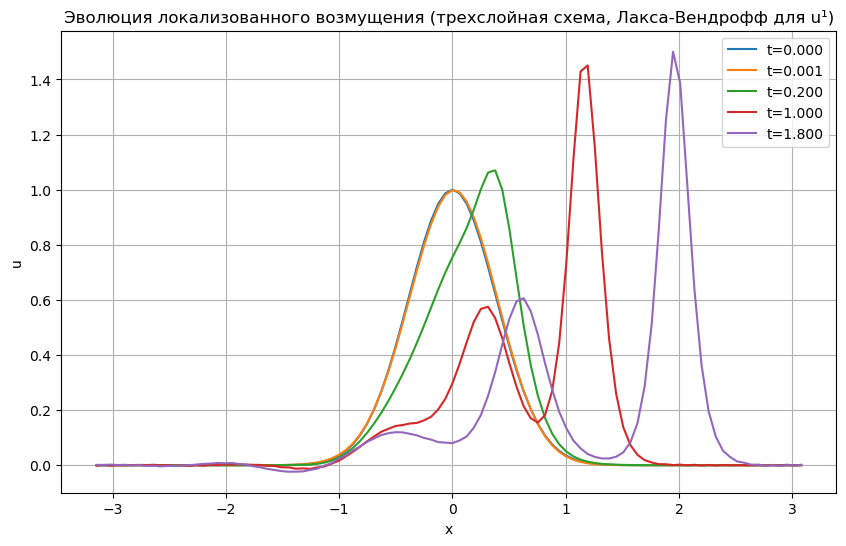

In [204]:
import numpy as np
import matplotlib.pyplot as plt

# Параметры задачи
L = np.pi
N = 100
dx = L / N
x = np.linspace(-L, L, N, endpoint=False)
x0 = 0

beta = 1e-3
u0 = 1.0
sigma = np.sqrt(12)*5 # критическое значение
dt = 1.0e-3
T = 2.0
t_steps = int(T / dt)

# l по формуле из условия
l = sigma * np.sqrt(beta) / np.sqrt(u0)

# Начальное условие
u_init = u0 * np.exp(-((x - x0) ** 2) / l**2)

# --- Схема Лакса-Вендроффа для первого временного слоя ---
u_prev = u_init.copy()
u_half = np.zeros(N)
for j in range(N):
    jp1 = (j + 1) % N
    jm1 = (j - 1) % N
    u_half[j] = 0.5 * (u_prev[jp1] + u_prev[j]) \
        - (dt / (4 * dx)) * (u_prev[jp1]**2 - u_prev[j]**2) \
        + (2 * beta / dx**2) * (u_prev[(j+2)%N] - 3*u_prev[jp1] + 3*u_prev[j] - u_prev[jm1])

u_curr = np.zeros(N)
for j in range(N):
    jp1 = (j + 1) % N
    jm1 = (j - 1) % N
    u_curr[j] = u_prev[j] \
        - (dt / (2 * dx)) * (u_half[j]**2 - u_half[jm1]**2) \
        + (2 * beta / dx**2) * (u_half[jp1] - 3*u_half[j] + 3*u_half[jm1] - u_half[(j-2)%N])

# --- Трехслойная явная схема для последующих слоев ---
u_history = [u_prev.copy(), u_curr.copy()]
t_points = [0, dt]

for n in range(1, t_steps):
    u_next = np.zeros(N)
    for j in range(N):
        jp1 = (j + 1) % N
        jp2 = (j + 2) % N
        jp3 = (j + 3) % N
        jm1 = (j - 1) % N
        jm2 = (j - 2) % N
        jm3 = (j - 3) % N
        # Формула из схемы 3 на слайде
        u_next[j] = u_prev[j] \
            + (dt * u_curr[j] / (6 * dx)) * (u_curr[jp2] - 8*u_curr[jp1] + 8*u_curr[jm1] - u_curr[jm2]) \
            + (beta * dt / (4 * dx**3)) * (u_curr[jp3] - 8*u_curr[jp2] + 13*u_curr[jp1] - 13*u_curr[jm1] + 8*u_curr[jm2] - u_curr[jm3])
    u_prev, u_curr = u_curr, u_next
    # Сохраняем несколько слоев для анализа
    if n in [int(t_steps*0.1), int(t_steps*0.5), int(t_steps*0.9)]:
        u_history.append(u_curr.copy())
        t_points.append(n*dt)

# --- Визуализация ---
plt.figure(figsize=(10,6))
for i, t in enumerate(t_points):
    plt.plot(x, u_history[i], label=f"t={t:.3f}")
plt.xlabel('x')
plt.ylabel('u')
plt.title('Эволюция локализованного возмущения (трехслойная схема, Лакса-Вендрофф для u¹)')
plt.legend()
plt.grid()
plt.show()

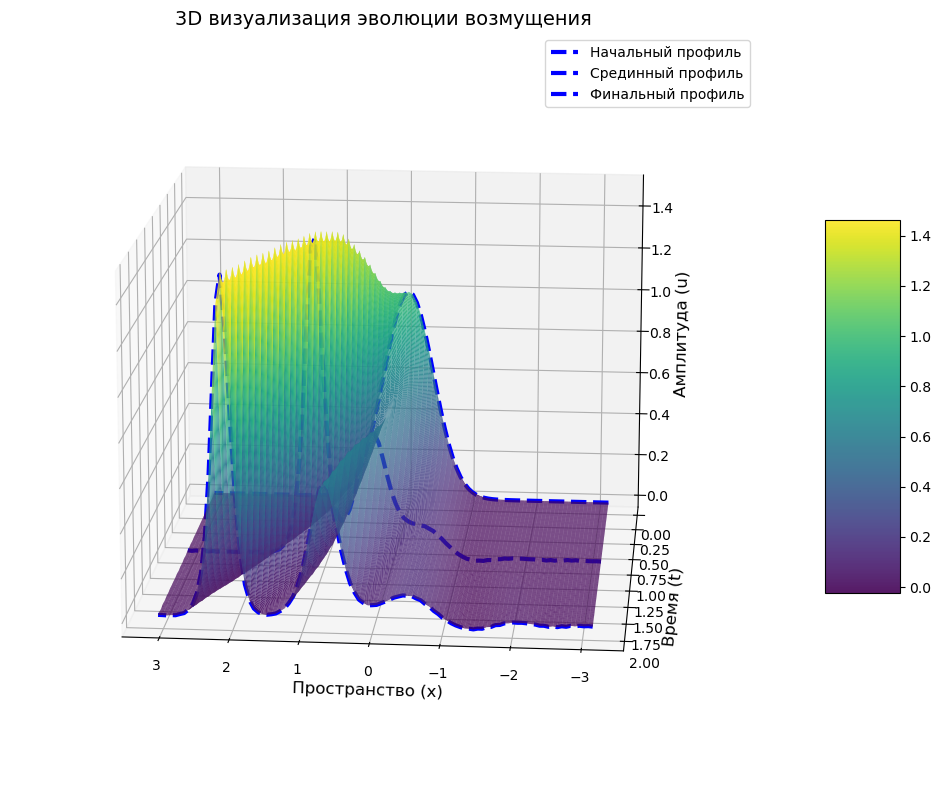

In [199]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Параметры задачи
L = np.pi
N = 100
dx = L / N
x = np.linspace(-L, L, N, endpoint=False)
x0 = 0

beta = 1e-3
u0 = 1.0
sigma = np.sqrt(12)*5
dt = 1.0e-4
T = 2.0
t_steps = int(T / dt)

# l по формуле из условия
l = sigma * np.sqrt(beta) / np.sqrt(u0)

# Начальное условие
u_init = u0 * np.exp(-((x - x0) ** 2) / l**2)

# --- Схема Лакса-Вендроффа для первого временного слоя ---
u_prev = u_init.copy()
u_half = np.zeros(N)
for j in range(N):
    jp1 = (j + 1) % N
    jm1 = (j - 1) % N
    u_half[j] = 0.5 * (u_prev[jp1] + u_prev[j]) \
        - (dt / (4 * dx)) * (u_prev[jp1]**2 - u_prev[j]**2) \
        + (2 * beta / dx**2) * (u_prev[(j+2)%N] - 3*u_prev[jp1] + 3*u_prev[j] - u_prev[jm1])

u_curr = np.zeros(N)
for j in range(N):
    jp1 = (j + 1) % N
    jm1 = (j - 1) % N
    u_curr[j] = u_prev[j] \
        - (dt / (2 * dx)) * (u_half[j]**2 - u_half[jm1]**2) \
        + (2 * beta / dx**2) * (u_half[jp1] - 3*u_half[j] + 3*u_half[jm1] - u_half[(j-2)%N])

# --- Трехслойная схема с сохранением истории ---
save_interval = 100  # Сохраняем каждые 500 шагов
u_history = [u_init.copy(), u_curr.copy()]
time_history = [0.0, dt]

for n in range(1, t_steps):
    u_next = np.zeros(N)
    for j in range(N):
        jp1 = (j + 1) % N
        jp2 = (j + 2) % N
        jp3 = (j + 3) % N
        jm1 = (j - 1) % N
        jm2 = (j - 2) % N
        jm3 = (j - 3) % N
        
        u_next[j] = u_prev[j] \
            + (dt * u_curr[j] / (6 * dx)) * (u_curr[jp2] - 8*u_curr[jp1] + 8*u_curr[jm1] - u_curr[jm2]) \
            + (beta * dt / (4 * dx**3)) * (u_curr[jp3] - 8*u_curr[jp2] + 13*u_curr[jp1] - 13*u_curr[jm1] + 8*u_curr[jm2] - u_curr[jm3])
    
    u_prev, u_curr = u_curr, u_next
    
    # Сохраняем данные для поверхности
    if n % save_interval == 0:
        u_history.append(u_curr.copy())
        time_history.append(n*dt)

# Преобразование данных для 3D визуализации
X, T = np.meshgrid(x, time_history)
U = np.array(u_history)

# --- Построение 3D поверхности ---
fig = plt.figure(figsize=(14, 8))
ax = fig.add_subplot(111, projection='3d')

# Настройка поверхности
surf = ax.plot_surface(X, T, U, cmap='viridis', rstride=1, cstride=1, alpha=0.9)

# Настройка внешнего вида
ax.set_xlabel('Пространство (x)', fontsize=12)
ax.set_ylabel('Время (t)', fontsize=12)
ax.set_zlabel('Амплитуда (u)', fontsize=12)
ax.set_title('3D визуализация эволюции возмущения', fontsize=14)

# Цветовая шкала
fig.colorbar(surf, shrink=0.5, aspect=5)

# Линии на плоскости
ax.plot(x, np.zeros_like(x), u_init, 'b--', linewidth=3, label='Начальный профиль')
ax.plot(x, T[int(len(T)/2)]*np.ones_like(x), U[int(len(U)/2)], 'b--', linewidth=3, label='Срединный профиль')
ax.plot(x, T[-1]*np.ones_like(x), U[-1], 'b--', linewidth=3, label='Финальный профиль')

# Угол обзора
ax.view_init(15, 95)

# Легенда
ax.legend()

plt.tight_layout()
plt.show()